<a href="https://colab.research.google.com/github/Th4l3s-pr0g/estudo-IA-CC/blob/main/RegressaoLinear2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nova seção

#Primeiro passo: importar os dados do CSV para o Python

In [ ]:
import pandas as pd 
dataFrame = pd.read_csv("/content/kc_house_data.csv")
print("Quantidade de linhas do data frame:", len(dataFrame))
print("Quantidade de colunas do data frame:", len(dataFrame.columns))

Quantidade de linhas do data frame: 21613
Quantidade de colunas do data frame: 21


#Uma vez que os dados foram importados, vamos analisar os primeiros registros

In [ ]:
dataFrame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#Passo 3: vimos que regressão linear trabalha bem com dados numéricos. Logo, vamos pedir para o Python mostrar os tipos dos dados das colunas.

In [ ]:
dataFrame.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#Passo 4: vamos fazer uma correlação de variáveis  do dataframe. No caso veremos a correlação das variáveis com o preço do imóvel.

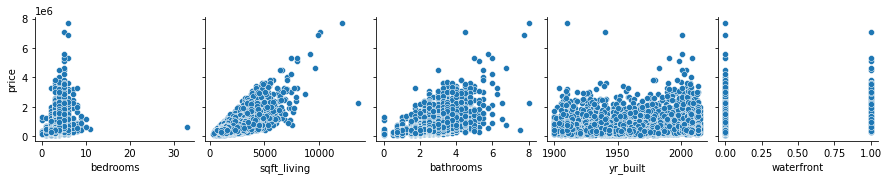

In [ ]:
import seaborn as sb
sb.pairplot(dataFrame, 
            x_vars=["bedrooms", "sqft_living", "bathrooms", "yr_built", "waterfront"],
            y_vars=["price"]
            )

#PRIMEIRO VAMOS GERAR UMA REGRESSÃO LINEAR SIMPLES, que utiliza apenas uma variável.

In [ ]:
# variável INDEPENDENTE
x = dataFrame[["sqft_living"]]
#x

# variável DEPENDENTE
y = dataFrame[["price"]]
#y

#Passo 6: separar dados de teste e de treinamento

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)
print("Quantidade de registros separados para treinamento:", len(x_train))
print("Qauntidade de registros separados para teste:", len(x_test))

Quantidade de registros separados para treinamento: 18371
Qauntidade de registros separados para teste: 3242


#Passo 7: aplicar a regressão linear. A primeira coisa a fazer é importar a biblioteca que o algoritmo que fará o treinamento.

In [ ]:
from sklearn.linear_model import LinearRegression
objRL = LinearRegression()

#Passo 8: Agora que temos um objeto apto a aplicar a Regressão Linear, vamos npartir para o treinamento do modelo.

In [ ]:
objRL.fit(x_train, y_train)

LinearRegression()

#Passo 9: vamos pedir para o objRL prever o preço de casas com metragens que passarmos.

In [ ]:
data = [
        [1181],
        [2575],
        [775],
        [450]
]

objRL.predict(data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[287409.18821173],
       [679690.84637859],
       [173157.85878866],
       [ 81700.51380715]])

#Passo 10: A pergunta que não quer calar: cadê o gráfico gerado pelo objRL? Vamos pedir para o Python mostrar como ficou o gráfico de regressão linear gerado.

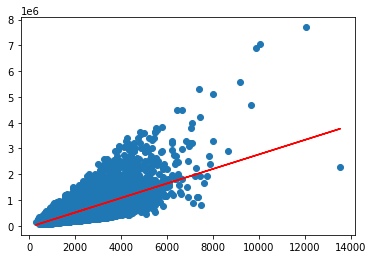

In [ ]:
y_pred = objRL.predict(x_train)

import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred, color="red")

#Passo 11: vamos medir a acurácia do modelo. Na estatística, no caso de regressão linear, há dois indicadores muito utilizados: o MSE e o R2. Devemos buscar o menor MSE possível e o R2 o mais próximo de 1 possível. Estatísticos defendem que modelos com R2 acima de 0.7 são bons.

In [ ]:
y_pred_test = objRL.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred_test))
print("R2:", r2_score(y_test, y_pred_test))

MSE: 62110071724.92009
R2: 0.48409694711436313


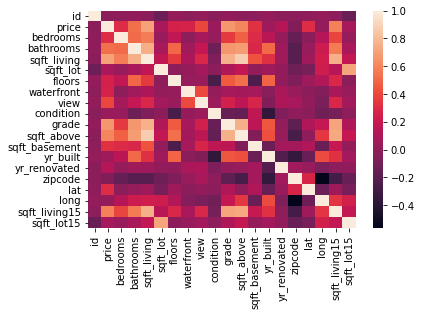

In [ ]:
sb.heatmap(dataFrame.corr())

#Passo 12: aprendemos acima como gerar uma regressão linear somples, que utiliza apenas uma uma variável independente para deduzir o valor da dependente. 

#Agora vamos tentar melhorar o modelo utilizando três variáveis independentes para prever o preço. No caso vamos uyilizar: sqft_living, grade e bathrooms.

In [ ]:
x2 = dataFrame[["sqft_living", "grade", "bathrooms"]]
y2 = dataFrame[["price"]]

#Passo 13: uma vez que as variáveis independentes e dependentes foram definidas, vamos separar dados para teste e treinamento, para evitarmos o overfitting.

In [ ]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.15)
print("Quantidade de dados separados para treinamentos:", len(x2_train))
print("Quantidade de dados separados para testes:", len(x2_test))

Quantidade de dados separados para treinamentos: 18371
Quantidade de dados separados para testes: 3242


#Passo 14: agora que os dados de treinamento e de teste foram separados, vamos treinar o modelo.

In [ ]:
from sklearn.linear_model import LinearRegression
objRL2 = LinearRegression()
objRL2.fit(x2_train,y2_train)

#Passo 15: uma vez que o modelo for treinado, vamos medir a sua acurácia.

In [ ]:
y2_pred_test = objRL2.predict(x2_test)
y2_pred_test

from sklearn.metrics import r2_score, mean_squared_error
print("R2:", r2_score(y2_test,y2_pred_test))
print("MSE:", mean_squared_error(y2_test,y2_pred_test))

R2: 0.5358347786553226
MSE: 56514319209.128395


#Passo final
#Recaptulando: primeiro , geramos uma regressão utilizando apenas UMA variável INDEPENDENTE. Depois, geramos uma regressão com TRÊS variáveis independentes. Agora vamos gerar um modelo com o máximo de variáveis independentes.

In [ ]:
#Variáveis independentes
x3 = dataFrame.drop(columns=["id", "date", "price"])
x3

#Variável dependente
y3 = dataFrame[["price"]]

In [ ]:
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.15)
print("Quantidade de registros separados para treinamento:", len(x3_train))
print("Quantidade de registros separados para teste:", len(x3_test))


Quantidade de registros separados para treinamento: 18371
Quantidade de registros separados para teste: 3242


In [ ]:
from sklearn.linear_model import LinearRegression
objRL3 = LinearRegression()
objRL3.fit(x3_train, y3_train)

LinearRegression()

In [ ]:
y3_pred_test = objRL3.predict(x3_test)
print("R2:", r2_score(y3_test, y3_pred_test))
print("MSE:", mean_squared_error(y3_test, y3_pred_test))

R2: 0.6906274496924284
MSE: 38684155363.47259


#Para termos noção de como está a performance do modelo, vamos gerar um gráfico que tornará intuitiva a comparação dos valores previstos com os reais.

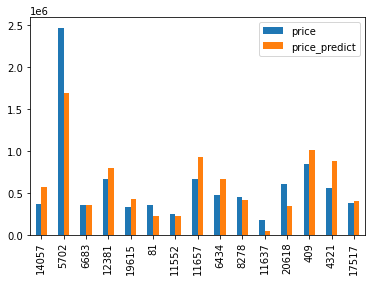

In [ ]:
y3_test["price_predict"] = y3_pred_test
y3_test
dfAnalise = y3_test.head(15)
dfAnalise.plot(kind="bar")